In [ ]:
import pandas as pd
#Import for KMeans Clustering
from sklearn.cluster import KMeans
#Standard Scaler input
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import *
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nidhicodes4045/datascience442/refs/heads/main/merged_data.csv")

In [ ]:
#Filtering out the ethnicity and food access columns
columns_of_interest = df.filter(like='Ethnicities').columns.to_list() + df.filter(regex='^Low Access Numbers.People').columns.to_list()
print(columns_of_interest)
filtered_df = df[columns_of_interest]
df_concat = pd.concat([filtered_df, df['mergedkeycol']], axis=1)
df_concat = pd.concat([filtered_df, df['Population']], axis=1)

['Ethnicities.American Indian and Alaska Native Alone', 'Ethnicities.Asian Alone', 'Ethnicities.Black Alone', 'Ethnicities.Hispanic or Latino', 'Ethnicities.Native Hawaiian and Other Pacific Islander Alone', 'Ethnicities.Two or More Races', 'Ethnicities.White Alone', 'Ethnicities.White Alone\t not Hispanic or Latino', 'Low Access Numbers.People.1 Mile', 'Low Access Numbers.People.1/2 Mile', 'Low Access Numbers.People.10 Miles', 'Low Access Numbers.People.20 Miles']


In [ ]:
#Convert this col to int from float. May interfere with calculations later.
df_concat['Low Access Numbers.People.1 Mile'] = df_concat['Low Access Numbers.People.1 Mile'].astype(int)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Ethnicities.American Indian and Alaska Native Alone           3138 non-null   float64
 1   Ethnicities.Asian Alone                                       3138 non-null   float64
 2   Ethnicities.Black Alone                                       3138 non-null   float64
 3   Ethnicities.Hispanic or Latino                                3138 non-null   float64
 4   Ethnicities.Native Hawaiian and Other Pacific Islander Alone  3138 non-null   float64
 5   Ethnicities.Two or More Races                                 3138 non-null   float64
 6   Ethnicities.White Alone                                       3138 non-null   float64
 7   Ethnicities.White Alone	 not Hispanic or Latino               3138 no

In [ ]:
#Function to convert a column to a percentage by dividing by population column
#and storing the %age in a new column
def convert_to_percentage(df, column_name):
    df[f'{column_name} Percentage'] = (df[column_name] / df['Population']) * 100
    return df

# Apply the function to all columns starting with 'Low Access Numbers.People'
for column in df_concat.columns:
    if column.startswith('Low Access Numbers.People'):
        df_concat = convert_to_percentage(df_concat, column)

#Check
df_concat.head()

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,73.8,37424,49497,5119,0,54571,68.578549,90.702021,9.380440,0.0
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,83.2,132442,165616,2308,0,182265,72.664527,90.865498,1.266288,0.0
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,45.5,16444,23762,4643,0,27457,59.890010,86.542594,16.910078,0.0
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,74.4,17560,20989,365,0,22915,76.631028,91.595025,1.592843,0.0
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,86.8,50848,54933,0,0,57322,88.705907,95.832316,0.000000,0.0


In [ ]:
#Check the new df
df_concat.describe()

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3.138000e+03,3138.000000,3138.000000,3.138000e+03,3138.000000,3138.000000,3138.000000,3138.000000
mean,2.276163,1.577565,9.371989,9.755003,0.147387,2.180880,84.392065,75.855577,38023.470682,6.850762e+04,1634.527087,171.686424,9.831282e+04,68.180527,83.356123,11.508969,2.783405
std,7.283049,2.952986,14.448269,13.832415,0.968816,1.569143,16.288943,20.126581,63717.908226,1.642375e+05,2385.790042,823.323933,3.131279e+05,53.853242,11.684802,19.005197,12.718169
min,0.000000,0.100000,0.100000,0.600000,0.000000,0.300000,8.000000,2.700000,0.000000,8.200000e+01,0.000000,0.000000,8.200000e+01,0.000000,0.029952,0.000000,0.000000
25%,0.400000,0.500000,0.900000,2.500000,0.000000,1.400000,79.600000,64.125000,7762.750000,9.529000e+03,173.250000,0.000000,1.112700e+04,51.217486,77.531678,0.430659,0.000000
50%,0.700000,0.800000,2.600000,4.500000,0.100000,1.800000,91.300000,83.200000,16452.500000,2.255450e+04,954.000000,0.000000,2.589000e+04,66.049589,85.491071,4.245057,0.000000
75%,1.300000,1.475000,10.900000,10.100000,0.100000,2.500000,95.400000,92.100000,39954.500000,5.718500e+04,2284.000000,0.000000,6.678000e+04,79.011590,91.312368,14.014054,0.000000
max,86.800000,43.400000,86.600000,96.400000,48.800000,30.500000,99.000000,97.800000,903299.000000,3.696268e+06,37500.000000,17768.000000,9.818605e+06,1700.517063,100.000000,100.000000,100.000000


In [ ]:
#Outlier for 1 mile percentage. Need to investigate
df_concat[df_concat['Low Access Numbers.People.1 Mile Percentage'] > 100]

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage
18,0.6,0.2,30.9,2.6,0.2,1.4,66.8,65.1,16444,10975,2607,0,11539,142.508016,95.112228,22.592946,0.000000
80,13.1,21.9,1.3,8.6,1.0,7.7,55.0,49.1,16444,10942,1633,644,13592,120.982931,80.503237,12.014420,4.738081
158,0.4,0.5,30.9,4.7,0.0,1.7,66.4,62.3,16444,8121,2346,0,8997,182.772035,90.263421,26.075358,0.000000
229,2.6,0.9,0.7,12.7,0.1,3.1,92.6,82.1,16444,3240,2859,105,3240,507.530864,100.000000,88.240741,3.240741
274,1.3,0.7,0.9,19.2,0.2,2.0,95.0,77.5,16444,6397,2167,247,8270,198.839178,77.351874,26.203144,2.986699
276,2.6,0.8,1.0,35.4,0.0,2.4,93.2,61.0,16444,5855,269,0,7310,224.952120,80.095759,3.679891,0.000000
475,0.9,1.3,27.5,11.0,0.4,4.2,65.6,57.2,16444,13718,108,0,14464,113.689159,94.842367,0.746681,0.000000
579,6.6,1.7,0.6,4.7,0.2,3.4,87.5,83.7,16444,2928,1835,0,3821,430.358545,76.629155,48.024077,0.000000
632,0.2,0.3,0.3,1.8,0.0,0.8,98.3,96.6,16444,8872,967,0,9698,169.560734,91.482780,9.971128,0.000000
668,0.7,0.4,5.4,1.7,0.1,1.3,92.1,90.5,16444,3966,1301,0,4470,367.874720,88.724832,29.105145,0.000000


In [ ]:
#Drop the rows with percentage > 100
df_concat = df_concat[df_concat['Low Access Numbers.People.1 Mile Percentage'] <= 100]

In [ ]:
#Describe the df again
df_concat.describe()

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone\t not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage
count,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3.079000e+03,3079.000000,3079.000000,3.079000e+03,3079.000000,3079.000000,3079.000000,3079.000000
mean,2.258818,1.589412,9.444787,9.703865,0.148230,2.183501,84.320689,75.832543,38436.977915,6.969191e+04,1634.937317,170.043521,1.000421e+05,63.505289,83.398435,11.223186,2.721708
std,7.228687,2.954897,14.475261,13.762095,0.977829,1.575639,16.290971,20.106561,64254.940203,1.655779e+05,2402.632480,827.620516,3.158624e+05,20.417550,11.676711,18.827445,12.700561
min,0.000000,0.100000,0.100000,0.600000,0.000000,0.300000,8.000000,2.700000,0.000000,8.200000e+01,0.000000,0.000000,8.200000e+01,0.000000,0.029952,0.000000,0.000000
25%,0.400000,0.500000,0.900000,2.500000,0.000000,1.400000,79.400000,64.150000,7633.000000,9.877000e+03,166.500000,0.000000,1.159750e+04,50.974325,77.683744,0.397637,0.000000
50%,0.700000,0.800000,2.600000,4.500000,0.100000,1.800000,91.200000,83.100000,17076.000000,2.326400e+04,947.000000,0.000000,2.660400e+04,65.566038,85.569642,4.105297,0.000000
75%,1.300000,1.500000,11.050000,10.100000,0.100000,2.500000,95.400000,92.100000,40839.000000,5.818900e+04,2287.000000,0.000000,6.879350e+04,78.174625,91.321674,13.380361,0.000000
max,86.800000,43.400000,86.600000,96.400000,48.800000,30.500000,99.000000,97.800000,903299.000000,3.696268e+06,37500.000000,17768.000000,9.818605e+06,100.000000,100.000000,100.000000,100.000000


In [ ]:
#Get final columns in df
df_concat.columns

Index(['Ethnicities.American Indian and Alaska Native Alone',
       'Ethnicities.Asian Alone', 'Ethnicities.Black Alone',
       'Ethnicities.Hispanic or Latino',
       'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
       'Ethnicities.Two or More Races', 'Ethnicities.White Alone',
       'Ethnicities.White Alone\t not Hispanic or Latino',
       'Low Access Numbers.People.1 Mile',
       'Low Access Numbers.People.1/2 Mile',
       'Low Access Numbers.People.10 Miles',
       'Low Access Numbers.People.20 Miles', 'Population',
       'Low Access Numbers.People.1 Mile Percentage',
       'Low Access Numbers.People.1/2 Mile Percentage',
       'Low Access Numbers.People.10 Miles Percentage',
       'Low Access Numbers.People.20 Miles Percentage'],
      dtype='object')

In [ ]:
#Deciding if I need standard scaler
#Get variances of each column
df_concat.var()

#Since variances are quite different,
#it is safe to standardise

,0
Ethnicities.American Indian and Alaska Native Alone,5.225391e+01
Ethnicities.Asian Alone,8.731415e+00
Ethnicities.Black Alone,2.095332e+02
Ethnicities.Hispanic or Latino,1.893953e+02
Ethnicities.Native Hawaiian and Other Pacific Islander Alone,9.561494e-01
Ethnicities.Two or More Races,2.482639e+00
Ethnicities.White Alone,2.653957e+02
Ethnicities.White Alone\t not Hispanic or Latino,4.042738e+02
Low Access Numbers.People.1 Mile,4.128697e+09
Low Access Numbers.People.1/2 Mile,2.741605e+10


In [ ]:
#Replace the \t with a blank space in one of the cols
df_concat.columns = df_concat.columns.str.replace('\t', '')
df_concat.columns

Index(['Ethnicities.American Indian and Alaska Native Alone',
       'Ethnicities.Asian Alone', 'Ethnicities.Black Alone',
       'Ethnicities.Hispanic or Latino',
       'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
       'Ethnicities.Two or More Races', 'Ethnicities.White Alone',
       'Ethnicities.White Alone not Hispanic or Latino',
       'Low Access Numbers.People.1 Mile',
       'Low Access Numbers.People.1/2 Mile',
       'Low Access Numbers.People.10 Miles',
       'Low Access Numbers.People.20 Miles', 'Population',
       'Low Access Numbers.People.1 Mile Percentage',
       'Low Access Numbers.People.1/2 Mile Percentage',
       'Low Access Numbers.People.10 Miles Percentage',
       'Low Access Numbers.People.20 Miles Percentage'],
      dtype='object')

In [ ]:
#Get the selected features

features_1 = [
    'Ethnicities.American Indian and Alaska Native Alone',
    'Ethnicities.Asian Alone', 'Ethnicities.Black Alone',
    'Ethnicities.Hispanic or Latino',
    'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
    'Ethnicities.Two or More Races', 'Ethnicities.White Alone',
    'Ethnicities.White Alone not Hispanic or Latino',
    'Low Access Numbers.People.1/2 Mile Percentage',
    'Low Access Numbers.People.1 Mile Percentage',
    'Low Access Numbers.People.10 Miles Percentage',
    'Low Access Numbers.People.20 Miles Percentage',

]

#Apply the standard scaler to the respective features
scaler = StandardScaler()
X = df_concat[features_1]
X_sc = scaler.fit_transform(X)

Reference : https://becominghuman.ai/3-minute-read-to-how-to-find-optimal-number-of-clusters-using-k-means-algorithm-eaa6bdce92cc

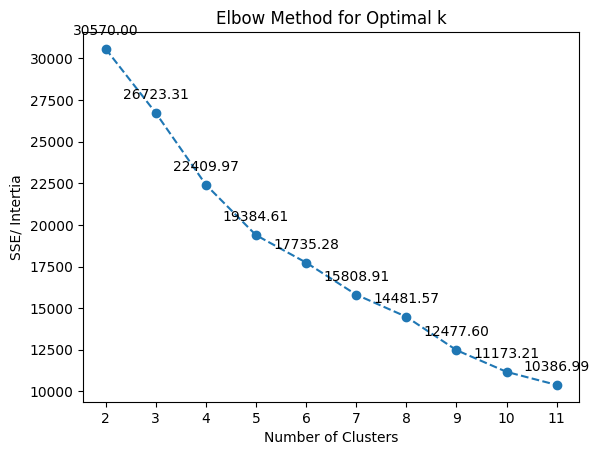

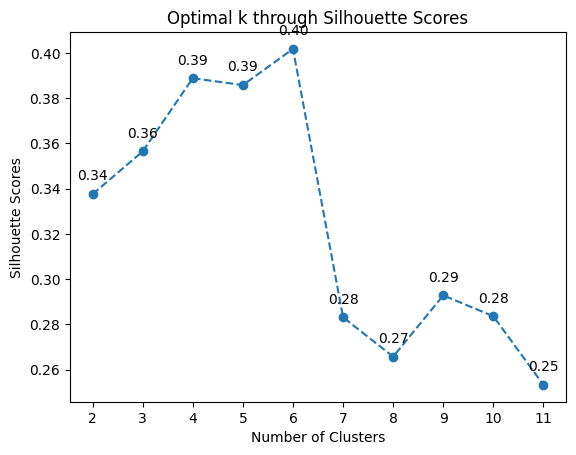

In [ ]:
#Finding the optimal k value

sse  = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_sc)
    sse.append(kmeans.inertia_)

# plot k to sse
plt.plot(range(2, 12), sse, "o--")
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE/ Intertia")
plt.title("Elbow Method for Optimal k")

#Annotate each point
for i, txt in enumerate(sse):
    plt.annotate(f'{txt:.2f}', (range(2, 12)[i], sse[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


#Define a fuction to get and plot Silhouette scores given a model
def s_scores(modelname, X_sc):
    sil_scores  = []
    for k in range(2, 12):
        model = modelname(n_clusters=k, random_state=42)
        model_labels = model.fit_predict(X_sc)
        score = silhouette_score(X_sc, model_labels)
        sil_scores.append(score)
        # plot k to sse
    plt.plot(range(2, 12), sil_scores, "o--")
    plt.xticks(range(2, 12))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Scores")
    plt.title("Optimal k through Silhouette Scores")
    #Annotate each point
    for i, txt in enumerate(sil_scores):
      plt.annotate(f'{txt:.2f}', (range(2, 12)[i], sil_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.show()

#Pass in kmeans param to s_scores function
s_scores(KMeans, X_sc)

In [ ]:
#Maybe strike a balance between both and choose 5?
#Since SSE suggests 4 and SS 6

k_optimal = 5

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_concat['Cluster'] = kmeans.fit_predict(X_sc)
df_concat.head()

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage,Cluster
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,73.8,37424,49497,5119,0,54571,68.578549,90.702021,9.380440,0.0,4
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,83.2,132442,165616,2308,0,182265,72.664527,90.865498,1.266288,0.0,4
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,45.5,16444,23762,4643,0,27457,59.890010,86.542594,16.910078,0.0,2
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,74.4,17560,20989,365,0,22915,76.631028,91.595025,1.592843,0.0,4
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,86.8,50848,54933,0,0,57322,88.705907,95.832316,0.000000,0.0,4


In [ ]:
# Get basic cluster characteristics by feature
cluster_summary = df_concat.groupby('Cluster')[features_1].mean()
print(cluster_summary)

         Ethnicities.American Indian and Alaska Native Alone  \
Cluster                                                        
0                                                36.859259     
1                                                 1.768072     
2                                                 0.793632     
3                                                 2.439726     
4                                                 1.285172     

         Ethnicities.Asian Alone  Ethnicities.Black Alone  \
Cluster                                                     
0                       3.287654                 2.317284   
1                       4.355020                 8.750803   
2                       1.039858                40.069575   
3                       0.693151                 1.431507   
4                       0.982127                 3.714878   

         Ethnicities.Hispanic or Latino  \
Cluster                                   
0                              6.0790

In [ ]:
#Check cluster sizes
df_concat['Cluster'].value_counts()
#Cluster 0 is very dominant but no clear trends possibly

,count
Cluster,
4,2003
1,498
2,424
0,81
3,73


In [ ]:
#Get the top contributing features for each cluster
cluster_centers = kmeans.cluster_centers_

for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}:")
    top_indices = np.abs(cluster_centers[i]).argsort()[::-1][:10]
    for idx in top_indices:
        print(f"  {features_1[idx]}: {cluster_centers[i][idx]:.2f}")

#Maybe this is useful? Not very sure atp.

Cluster 0:
  Ethnicities.American Indian and Alaska Native Alone: 4.79
  Ethnicities.Two or More Races: 3.35
  Ethnicities.White Alone: -2.18
  Ethnicities.White Alone not Hispanic or Latino: -1.50
  Ethnicities.Native Hawaiian and Other Pacific Islander Alone: 1.18
  Low Access Numbers.People.10 Miles Percentage: 0.65
  Ethnicities.Asian Alone: 0.57
  Low Access Numbers.People.20 Miles Percentage: 0.52
  Ethnicities.Black Alone: -0.49
  Low Access Numbers.People.1 Mile Percentage: 0.29
Cluster 1:
  Ethnicities.Hispanic or Latino: 1.48
  Low Access Numbers.People.1 Mile Percentage: -1.31
  Low Access Numbers.People.1/2 Mile Percentage: -1.16
  Ethnicities.White Alone not Hispanic or Latino: -1.05
  Ethnicities.Asian Alone: 0.94
  Low Access Numbers.People.10 Miles Percentage: -0.33
  Ethnicities.Two or More Races: 0.33
  Ethnicities.White Alone: -0.14
  Low Access Numbers.People.20 Miles Percentage: -0.13
  Ethnicities.Native Hawaiian and Other Pacific Islander Alone: 0.08
Cluster 2:
 

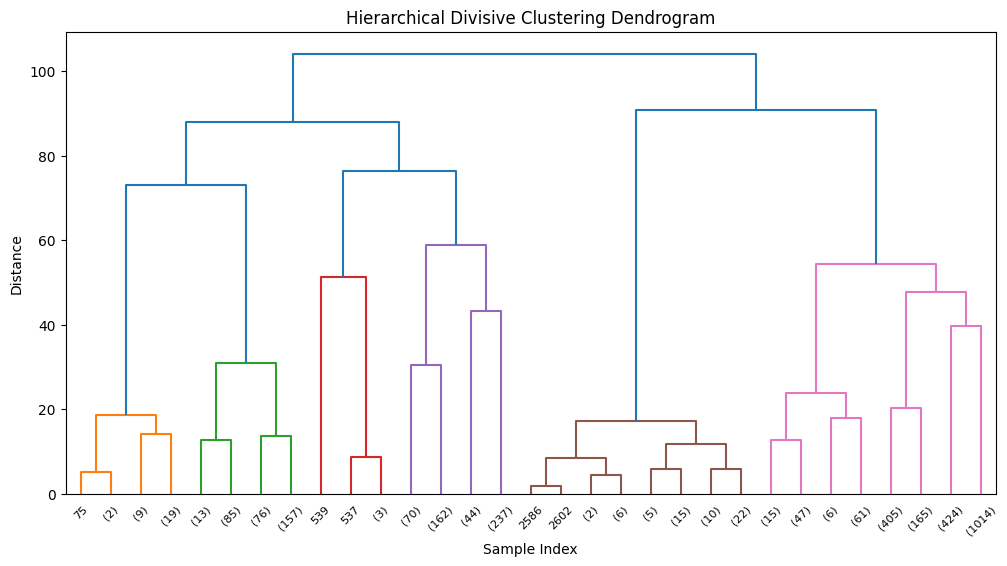

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_sc, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=4)
plt.title("Hierarchical Divisive Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


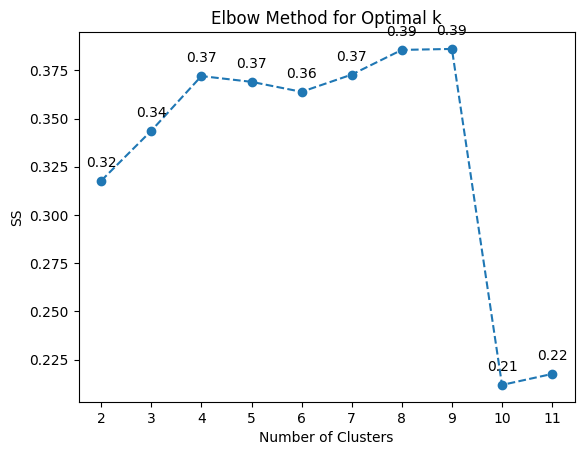

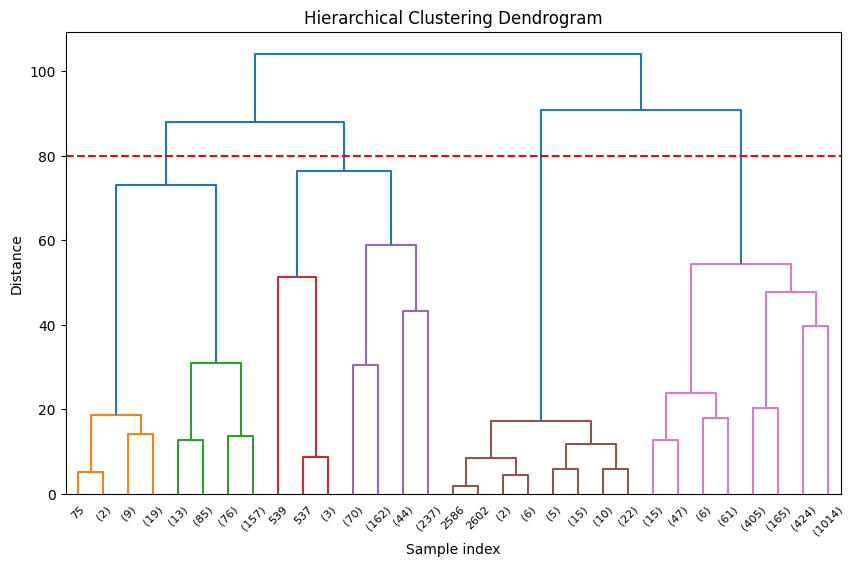

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage,Cluster,Cluster Div
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,73.8,37424,49497,5119,0,54571,68.578549,90.702021,9.380440,0.0,4,4
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,83.2,132442,165616,2308,0,182265,72.664527,90.865498,1.266288,0.0,4,4
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,45.5,16444,23762,4643,0,27457,59.890010,86.542594,16.910078,0.0,2,1
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,74.4,17560,20989,365,0,22915,76.631028,91.595025,1.592843,0.0,4,4
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,86.8,50848,54933,0,0,57322,88.705907,95.832316,0.000000,0.0,4,4


In [ ]:
from scipy.cluster.hierarchy import fcluster

#Repeat the silhouette scores process.
sil_scores_new  = []
for k in range(2, 12):
    div_labels = fcluster(Z, t=k, criterion='maxclust')  # Try 3–5 clusters
    score = silhouette_score(X_sc, div_labels)
    sil_scores_new.append(score)

# plot k to see
plt.plot(range(2, 12), sil_scores_new, "o--")
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SS")
plt.title("Elbow Method for Optimal k")

#Annotate each point
for i, txt in enumerate(sil_scores_new):
    plt.annotate(f'{txt:.2f}', (range(2, 12)[i], sil_scores_new[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

#Go with 4 for interpretability

# Compute linkage matrix
linkage_matrix = linkage(X_sc, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
# builds the dendrogram for only 4 levels
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
# drawing cutoff line
plt.axhline(y=80, color='r', linestyle='--')  # Adjust the cut-off threshold as needed
plt.grid(False)
plt.show()

clusters = fcluster(Z, t=4, criterion='maxclust')  # Try 3–5 clusters
df_concat['Cluster Div'] = clusters
df_concat.head()

In [ ]:
#Get basic cluster characteristics by feature
cluster_summary_div = df_concat.groupby('Cluster Div')[features_1].mean()
print(cluster_summary_div)

             Ethnicities.American Indian and Alaska Native Alone  \
Cluster Div                                                        
1                                                     6.099724     
2                                                     1.690734     
3                                                     1.840323     
4                                                     1.758025     

             Ethnicities.Asian Alone  Ethnicities.Black Alone  \
Cluster Div                                                     
1                           0.822099                39.101934   
2                           4.511969                10.221042   
3                           0.716129                 1.477419   
4                           1.036313                 4.463968   

             Ethnicities.Hispanic or Latino  \
Cluster Div                                   
1                                  4.188674   
2                                 29.319884   
3           

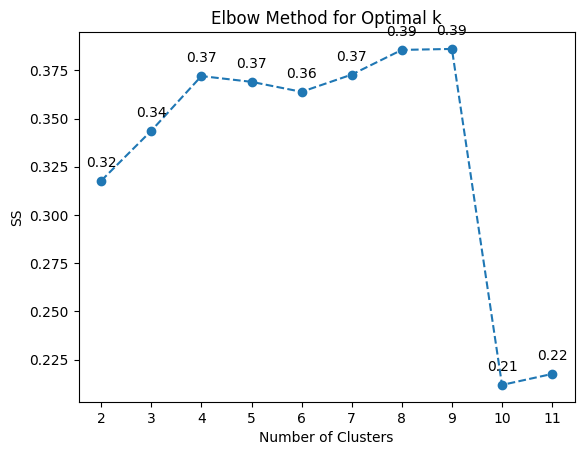

,Ethnicities.American Indian and Alaska Native Alone,Ethnicities.Asian Alone,Ethnicities.Black Alone,Ethnicities.Hispanic or Latino,Ethnicities.Native Hawaiian and Other Pacific Islander Alone,Ethnicities.Two or More Races,Ethnicities.White Alone,Ethnicities.White Alone not Hispanic or Latino,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles,Population,Low Access Numbers.People.1 Mile Percentage,Low Access Numbers.People.1/2 Mile Percentage,Low Access Numbers.People.10 Miles Percentage,Low Access Numbers.People.20 Miles Percentage,Cluster,Cluster Div,Cluster Agg
0,0.5,1.2,20.1,3.0,0.1,1.9,76.3,73.8,37424,49497,5119,0,54571,68.578549,90.702021,9.380440,0.0,4,4,3
1,0.8,1.1,8.8,4.7,0.1,1.9,87.4,83.2,132442,165616,2308,0,182265,72.664527,90.865498,1.266288,0.0,4,4,3
2,0.7,0.5,48.2,4.5,0.2,1.2,49.2,45.5,16444,23762,4643,0,27457,59.890010,86.542594,16.910078,0.0,2,1,0
3,0.5,0.2,21.3,2.8,0.1,1.2,76.8,74.4,17560,20989,365,0,22915,76.631028,91.595025,1.592843,0.0,4,4,3
4,0.6,0.3,1.7,9.7,0.1,1.4,95.8,86.8,50848,54933,0,0,57322,88.705907,95.832316,0.000000,0.0,4,4,3


In [ ]:
#Now trying agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

sil_scores  = []
for k in range(2, 12):
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agg_labels = agg_clustering.fit_predict(X_sc)
    score = silhouette_score(X_sc, agg_labels)
    sil_scores.append(score)

# plot k to sse
plt.plot(range(2, 12), sil_scores, "o--")
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SS")
plt.title("Elbow Method for Optimal k")

#Annotate each point
for i, txt in enumerate(sil_scores):
    plt.annotate(f'{txt:.2f}', (range(2, 12)[i], sil_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_concat['Cluster Agg'] = agg_clustering.fit_predict(X_sc)
df_concat.head()

In [ ]:
#Get basic cluster characteristics by feature
cluster_summary_agg = df_concat.groupby('Cluster Agg')[features_1].mean()
print(cluster_summary_agg)

             Ethnicities.American Indian and Alaska Native Alone  \
Cluster Agg                                                        
0                                                     6.099724     
1                                                     1.701949     
2                                                     1.840323     
3                                                     1.758025     
4                                                     0.540000     

             Ethnicities.Asian Alone  Ethnicities.Black Alone  \
Cluster Agg                                                     
0                           0.822099                39.101934   
1                           4.298246                10.305653   
2                           0.716129                 1.477419   
3                           1.036313                 4.463968   
4                          26.440000                 1.540000   

             Ethnicities.Hispanic or Latino  \
Cluster Agg         

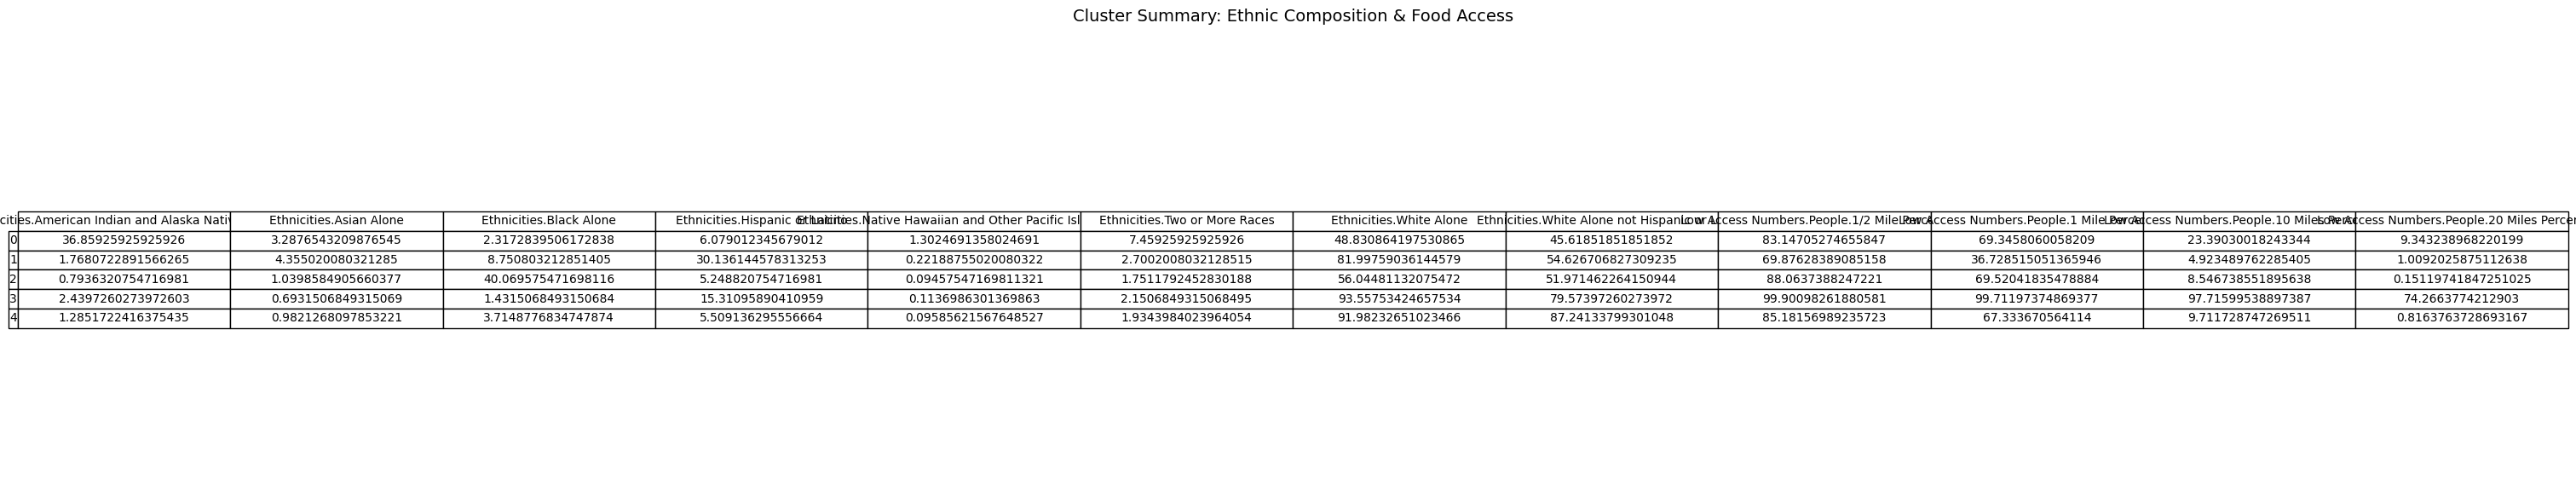

In [ ]:
#For each cluster summary plot a two way table
# Plot table using matplotlib
fig, ax = plt.subplots(figsize=(30, 6))  # You can adjust size
ax.axis('off')

# Create the table
table = ax.table(
    cellText=cluster_summary.values,
    colLabels=cluster_summary.columns,
    rowLabels=cluster_summary.index,
    loc='center',
    cellLoc='center'
)

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Optional title
plt.title("Cluster Summary: Ethnic Composition & Food Access", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
#Get silhouette scores for each clustering algorithm
kmeans_labels = kmeans.fit_predict(X_sc)
agg_labels = agg_clustering.fit_predict(X_sc)
div_labels = fcluster(Z, t=4, criterion='maxclust')

kmeans_score = silhouette_score(X_sc, kmeans_labels)
agg_score = silhouette_score(X_sc, agg_labels)
div_score = silhouette_score(X_sc, div_labels)

print(f"K-Means Silhouette Score: {kmeans_score:.3f}")
print(f"Agglomerative Silhouette Score: {agg_score:.3f}")
print(f"Divisive Silhouette Score: {div_score:.3f}")

K-Means Silhouette Score: 0.386
Agglomerative Silhouette Score: 0.369
Divisive Silhouette Score: 0.372


In [ ]:
#Proceeding with KMeans
print(cluster_summary)

         Ethnicities.American Indian and Alaska Native Alone  \
Cluster                                                        
0                                                36.859259     
1                                                 1.768072     
2                                                 0.793632     
3                                                 2.439726     
4                                                 1.285172     

         Ethnicities.Asian Alone  Ethnicities.Black Alone  \
Cluster                                                     
0                       3.287654                 2.317284   
1                       4.355020                 8.750803   
2                       1.039858                40.069575   
3                       0.693151                 1.431507   
4                       0.982127                 3.714878   

         Ethnicities.Hispanic or Latino  \
Cluster                                   
0                              6.0790

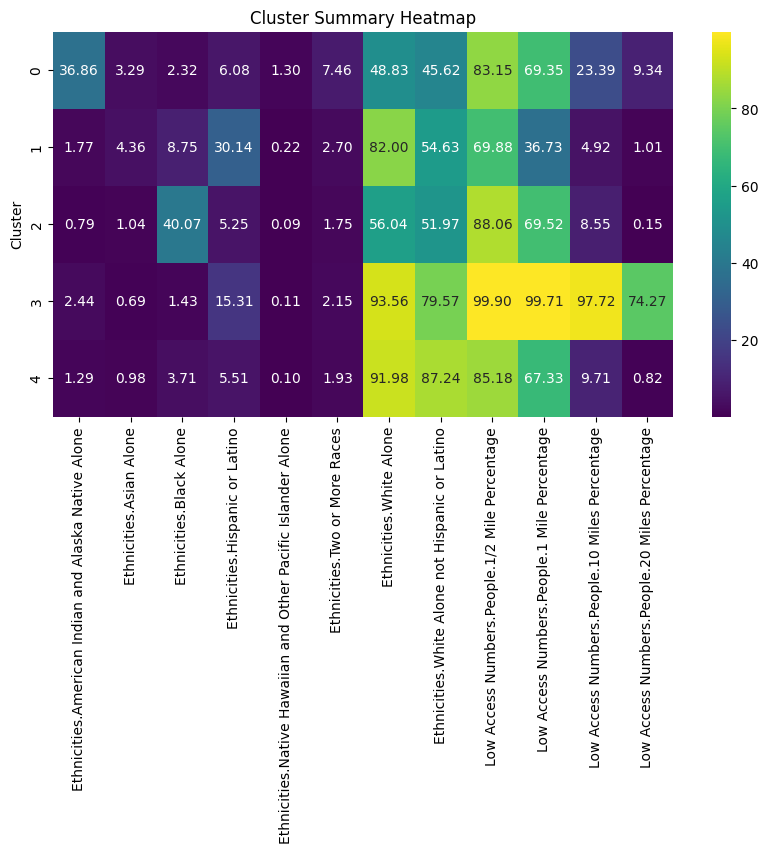

In [ ]:
#Plot a cluster summary heatmap
plt.figure(figsize=(10, 5))
sb.heatmap(cluster_summary, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Summary Heatmap')
plt.show()

In [ ]:
wcss = np.sum((X - kmeans.cluster_centers_[kmeans.labels_])**2, axis=0)
print(f"Within-Cluster Sum of Squares (WCSS):\n{wcss}")

Within-Cluster Sum of Squares (WCSS):
Ethnicities.American Indian and Alaska Native Alone             1.508145e+05
Ethnicities.Asian Alone                                         3.185963e+04
Ethnicities.Black Alone                                         8.565683e+05
Ethnicities.Hispanic or Latino                                  8.371859e+05
Ethnicities.Native Hawaiian and Other Pacific Islander Alone    2.893324e+03
Ethnicities.Two or More Races                                   2.007579e+04
Ethnicities.White Alone                                         2.264097e+07
Ethnicities.White Alone not Hispanic or Latino                  1.887266e+07
Low Access Numbers.People.1/2 Mile Percentage                   2.181429e+07
Low Access Numbers.People.1 Mile Percentage                     1.365270e+07
Low Access Numbers.People.10 Miles Percentage                   1.418345e+06
Low Access Numbers.People.20 Miles Percentage                   4.604865e+05
dtype: float64


In [ ]:
# Calculate pairwise distances between cluster centroids
from scipy.spatial.distance import cdist

centroids = kmeans.cluster_centers_
inter_cluster_distances = cdist(centroids, centroids, metric='euclidean')

# Extract the distance between each pair of clusters
inter_cluster_distances = inter_cluster_distances[np.triu_indices_from(inter_cluster_distances, k=1)]

print(f"Inter-cluster distances: {inter_cluster_distances}")

Inter-cluster distances: [6.84766467 6.96858152 9.65048834 7.14092387 4.14923305 8.87983957
 3.4531244  8.64292482 3.78860749 7.75620538]


In [72]:
print("KMeans Inertia\n")
print(kmeans.inertia_)

KMeans Inertia

19384.610833797084


<Axes: xlabel='Ethnicities.White Alone', ylabel='Low Access Numbers.People.20 Miles Percentage'>

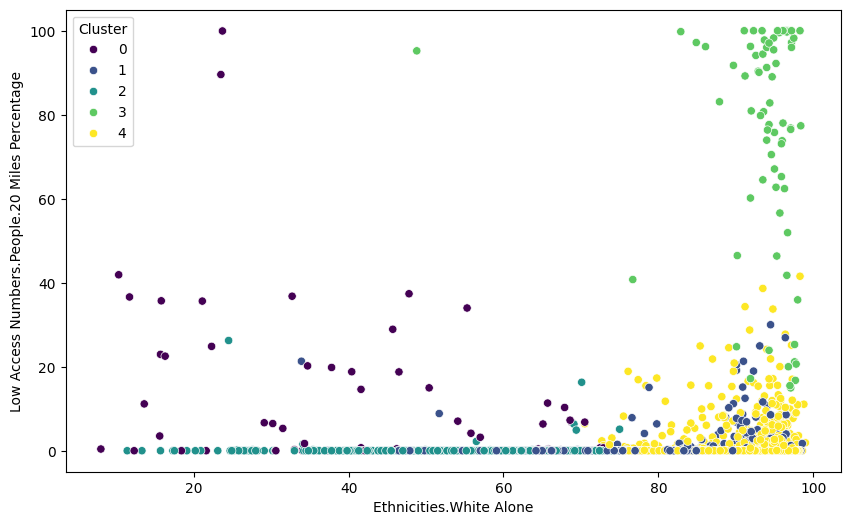

In [78]:
#Plot a scatter plot of access at 10 miles against native american by cluster
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df_concat, x='Ethnicities.White Alone', y='Low Access Numbers.People.20 Miles Percentage',  hue='Cluster', palette='viridis')